In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_data=pd.read_csv('gold_price.csv')

In [3]:
print(gold_data.head())

       Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099


In [4]:
print(gold_data.tail())

           Date          SPX         GLD      USO      SLV   EUR/USD
2285   5/8/2018  2671.919922  124.589996  14.0600  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.3700  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.4100  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.3800  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.4058  15.4542  1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
#getting statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
#finding correlation between the datas
#type:+ve correlation(if the gold increases ,silver also inncreases) and -ve correlation(if the gold increases ,sliver decreases)
print(gold_data.dtypes)


Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object


In [10]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

In [11]:
correlation=gold_data.corr()

<Axes: >

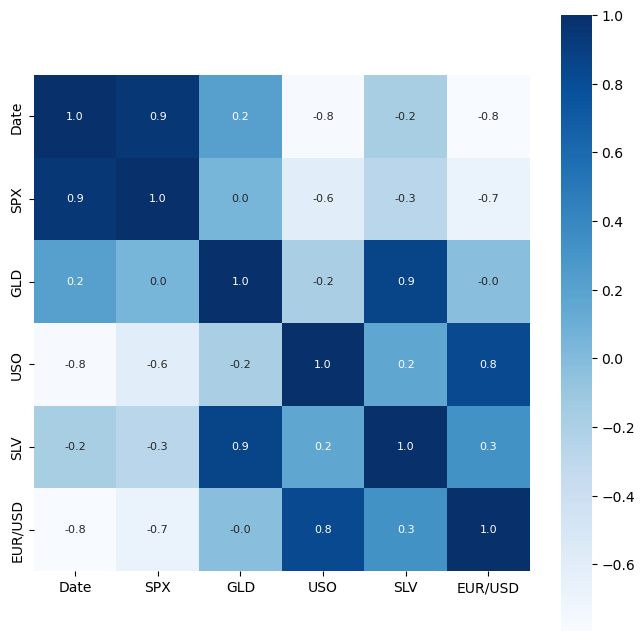

In [12]:
#constructing heatmap to understatnd correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [13]:
#correlation value of gold
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Count'>

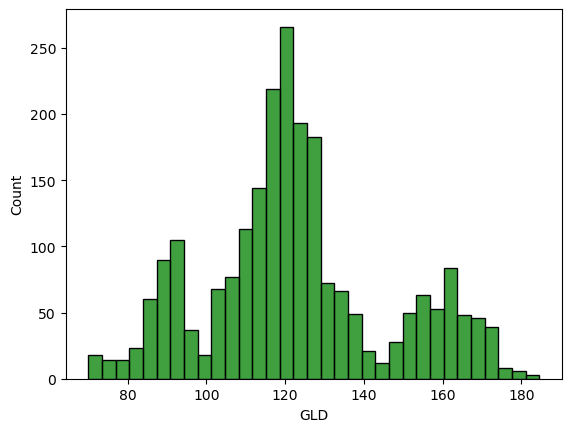

In [14]:
#checking the distribution of gold price
sns.histplot(gold_data['GLD'],color='green')

In [15]:
#splitting the target and features
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

In [16]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [17]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [19]:
#model training RANDOM FOREST REGRESSOR
regressor=RandomForestRegressor(n_estimators=100)

In [20]:
#train the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [21]:
#model evaluation
prediction=regressor.predict(x_test)

In [22]:
print(prediction)

[168.65879917  81.98929996 116.24850009 127.82780086 120.74810126
 154.64939742 150.06889829 126.09910026 117.48309872 126.04340039
 116.79390064 171.14640042 141.28349901 167.8349983  115.04680016
 117.52520036 139.53970245 170.3970014  158.83080327 160.37699927
 155.26700067 125.23880049 176.64450008 156.98660371 125.1385002
  93.7523996   77.56100012 120.61770018 119.10249935 167.43599956
  87.9039003  125.45020044  91.39320068 117.81300022 121.05639915
 135.93390031 115.44930124 115.40280049 147.0113997  107.23770088
 104.45260224  87.00699768 126.37010058 118.08170008 154.39749862
 119.60399991 108.3562996  108.07299811  93.1791005  127.06629786
  74.60670029 113.60439932 121.15270023 111.22219904 118.81849896
 120.38119944 159.24600059 167.9697008  146.92199658  85.84059854
  94.44810034  86.78409882  90.58570017 119.1155007  126.4134008
 127.58439983 168.19529918 122.22879921 117.28939863  98.51520042
 168.24700138 142.83849863 131.83580228 121.01480216 120.87129932
 119.7007003

In [23]:
#R squared error
err=metrics.r2_score(y_test,prediction)
print("R squared error:",err)

R squared error: 0.9889640843108984


In [24]:
#compare actual value with the predicted value

y_test=list(y_test)

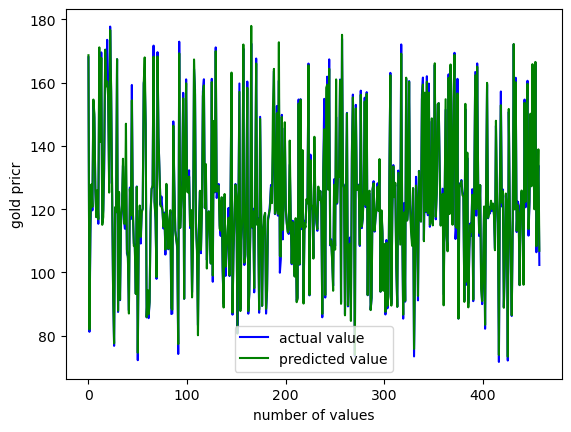

In [25]:
plt.plot(y_test,color='blue',label='actual value')
plt.plot(prediction,color='green',label='predicted value')
plt.xlabel('number of values')
plt.ylabel('gold pricr')
plt.legend()
plt.show()

In [52]:
#saving the trained model
import pickle

In [54]:
file='trained_model.sav'
pickle.dump(regressor,open(file,'wb'))

In [56]:
#loading the saved model
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [58]:
input= (1/2/2018,1447.160034,  84.860001,  78.470001,  15.180 , 1.471692)
num=np.asarray(input)
input_reshaped=num.reshape(1,-1)
predictions=loaded_model.predict(input_reshaped)
print(prediction)

C:\Users\harip\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 6 features, but RandomForestRegressor is expecting 4 features as input.